## Import libraries

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

In [66]:
df = pd.read_csv('Customer-Churn-Prediction.csv')

In [67]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [68]:
df.shape

(7043, 21)

## Show output data comparison

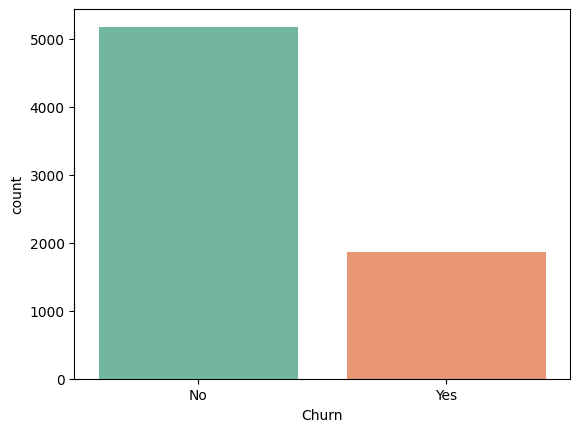

In [69]:
sns.countplot(data=df, x="Churn", hue="Churn", palette="Set2")
plt.show()

In [70]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [71]:
chruned = df[df['Churn'] == 'Yes'].shape[0]
retained = df[df['Churn'] == 'No'].shape[0]

In [72]:
# customer left the company
ch_per = ((chruned / (chruned + retained)) * 100)
ch_per

26.536987079369588

In [73]:
# customer stayed the company
re_per = ((retained / (chruned + retained)) * 100)
re_per

73.4630129206304

## Simple Visualizatio

<Axes: xlabel='gender', ylabel='count'>

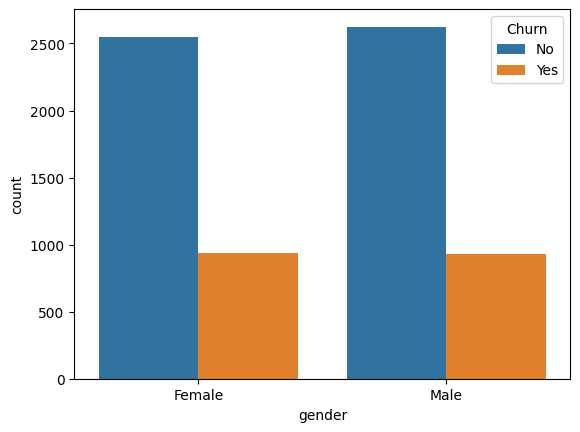

In [74]:
sns.countplot(x="gender", hue="Churn", data=df)

In [75]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

<Axes: xlabel='MultipleLines', ylabel='count'>

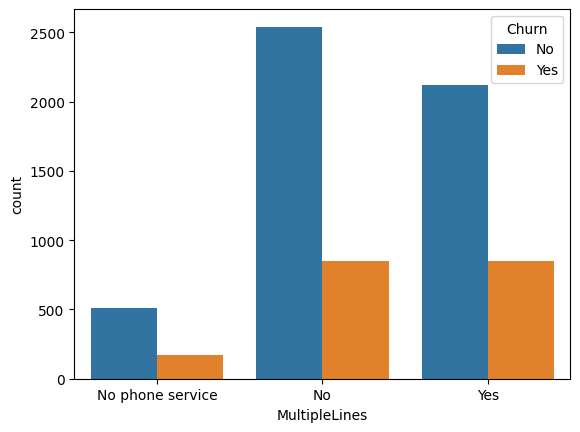

In [76]:
sns.countplot(x="MultipleLines", hue="Churn", data=df)

In [77]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

<Axes: xlabel='InternetService', ylabel='count'>

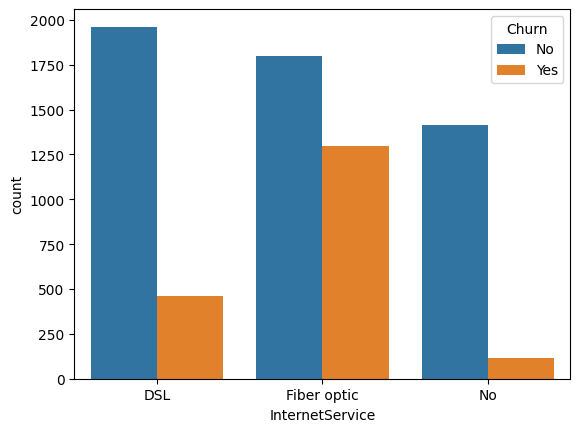

In [78]:
sns.countplot(x="InternetService", hue="Churn", data=df)

In [79]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

## Preprocessing Data

In [80]:
# drop customer id
df = df.drop('customerID', axis=1)

In [81]:
df.shape

(7043, 20)

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\SHAHRIAR\AppData\Local\Temp\ipykernel_13524\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\SHAHRIAR\AppData\Local\Temp\ipykernel_13524\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\SHAHRIAR\AppData\Local\Temp\ipykernel_13524\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\SHAHRIAR\AppData\Local\Temp\ipykernel_13524\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[colu

In [84]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [85]:
# seperate dependent & independent variables
x = df.drop('Churn', axis=1)
y = df['Churn']

In [86]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

## Scaling the dataset

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
feature_x = StandardScaler().fit_transform(x)

In [89]:
feature_x

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27197156,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

## Split dataset

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test, y_train,y_test = train_test_split(feature_x, y, test_size=.25,random_state=42)

In [92]:
x_test

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.32816441, -0.642709  ],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
        -1.31320824,  1.72841048],
       [-1.00955867, -0.44014635,  1.03453023, ...,  1.33486261,
        -1.50930029, -1.68953865],
       ...,
       [ 0.99053183, -0.44014635, -0.96662231, ..., -0.53774716,
         0.20401242, -0.89369395],
       [-1.00955867, -0.44014635, -0.96662231, ...,  0.39855772,
        -0.99912861,  0.94421487],
       [-1.00955867,  2.27197156, -0.96662231, ..., -0.53774716,
         0.30039665,  0.08588868]])

## Bulid Logistic Regression Model

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
model = LogisticRegression()

In [95]:
model.fit(x_train, y_train)

LogisticRegression()

In [98]:
pred = model.predict(x_test)

In [99]:
pred

array([1, 0, 0, ..., 0, 1, 0])

In [100]:
pred.shape

(1761,)

## Performance Metrics

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
# accuracy score
accuracy_score(y_test, pred)

0.8103350369108461

In [103]:
# confusion metrix
from sklearn.metrics import confusion_matrix

In [106]:
cm = confusion_matrix(y_test, pred)

In [107]:
cm

array([[1163,  119],
       [ 215,  264]], dtype=int64)

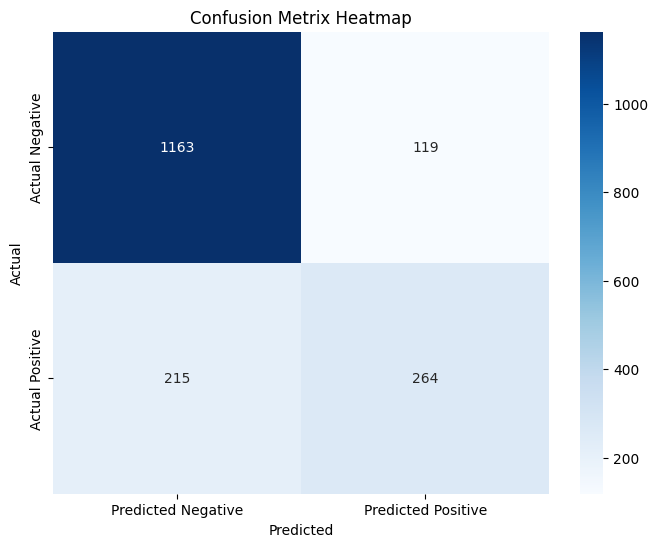

In [113]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Metrix Heatmap")
plt.show()

In [115]:
# classification report
from sklearn.metrics import classification_report

In [116]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1282
           1       0.69      0.55      0.61       479

    accuracy                           0.81      1761
   macro avg       0.77      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761

